In [1]:
#pip install google_images_download

In [4]:
# importing google_images_download module 
from google_images_download import google_images_download
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import os
import pandas as pd
from PIL import Image
import os, os.path

path_string = "D:/Githubrepos/DS-Unit-4-Sprint-2-Neural-Networks/downloads/"

class GoogleImage_to_Labeled_Df(object):
      
    def __init__(self, list_of_labels, limit, path_string, size_string="medium", response = google_images_download.googleimagesdownload()):
        self.search_queries = list_of_labels
        self.size_string = size_string
        self.limit = limit
        self.path_string = path_string
        self.response = response
    
        
    def downloadimages(self, query): 
        # keywords is the search query 
        # format is the image file format 
        # limit is the number of images to be downloaded 
        # print urs is to print the image file url 
        # size is the image size which can 
        # be specified manually ("large, medium, icon") 
        # aspect ratio denotes the height width ratio 
        # of images to download. ("tall, square, wide, panoramic")
        # no_numbering if removed will enumerate the files but with a . after and break the class
        arguments = {"keywords": query, 
                     "format": "jpg", 
                     "limit":self.limit, 
                     "print_urls":False, 
                     "size": self.size_string, 
                     "aspect_ratio": "square",
                     "no_numbering":"-nn"} 
        try: 
            self.response.download(arguments) 

        # Handling File NotFound Error     
        except FileNotFoundError:  
            arguments = {"keywords": query, 
                         "format": "jpg", 
                         "limit":self.limit, 
                         "print_urls":False,  
                         "size": self.size_string} 

            # Providing arguments for the searched query 
            try: 
                # Downloading the photos based 
                # on the given arguments 
                response.download(arguments)  
            except: 
                pass
    
    def rename_files(self, filename_string, path):
        #renames the files with the correc labels

        i = 0

        for filename in os.listdir(path): 
            dst = filename_string + str(i) + ".jpg"
            src = path + filename 
            dst = path + dst 

            # rename() function will 
            # rename all the files 
            os.rename(src, dst) 
            i += 1
            
    def rename_loop(self):
        imgs = []
        self.df = pd.DataFrame({'image_arrays' : [], 'label' : []})
        valid_images = [".jpg"]
            #loop through queries and paths to apply rename
        for i in range(len(self.search_queries)):
            self.paths = []
            self.paths.append(self.path_string + self.search_queries[i] + "/")
            for p in self.paths:
                    self.rename_files(self.search_queries[i], p)
                        
                        
    def get_images(self):
        # Driver Code 
        for query in self.search_queries: 
            self.downloadimages(query)  
            print()
            
    def make_df(self):
    
        self.df = pd.DataFrame({'image_arrays' : [], 'label' : []})
        valid_images = [".jpg","."]
        for i in range(len(self.search_queries)):
            for f in os.listdir(self.path_string + self.search_queries[i]):
                imgs = []
                ext = os.path.splitext(f)[1]
                if ext.lower() not in valid_images:
                    continue
                imgs.append(Image.open(self.path_string + self.search_queries[i] + "/" + f))
                for ims in imgs:
                    x = np.array(ims)
                    self.df = self.df.append({'image_arrays' : x, 'label': self.search_queries[i]} , ignore_index=True)
        print(f"Labeled DataFrame Complete with {self.df.shape[0]} rows and {self.df.shape[1]} columns")
        return self.df.head()
    
    def show_image(self,row_number):
        #takes in a row number and saves/returns the picture from the np.array row
        self.img = Image.fromarray(self.df.iloc[row_number][0])
        self.img.save(f"output{row_number}_{str(self.df.label[row_number])}.png")

        plt.imshow(self.img)
        plt.show()

In [5]:
cows_bats = GoogleImage_to_Labeled_Df(["cows","bats"], 3, path_string)

In [6]:
cows_bats.get_images()
cows_bats.rename_loop()
cows_bats.make_df()


Item no.: 1 --> Item name = cows
Evaluating...
Starting Download...
Completed Image ====> 1.17-cow.w700.h700.jpg
Completed Image ====> 2.13797_main_v16_tp.jpg
Completed Image ====> 3.Holstein-Cow-Headshot.jpg

Errors: 0



Item no.: 1 --> Item name = bats
Evaluating...
Starting Download...
Completed Image ====> 1.bat_rodrigues_baby.jpg
Completed Image ====> 2.27-bats.w700.h700.jpg
Completed Image ====> 3.P-brandts-bat.jpg

Errors: 0


Labeled DataFrame Complete with 6 rows and 2 columns


,image_arrays,label
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",cows
1,"[[[71, 139, 200], [74, 140, 201], [76, 140, 20...",cows
2,"[[[204, 216, 240], [198, 210, 236], [196, 210,...",cows
3,"[[[165, 199, 244], [163, 200, 244], [164, 201,...",bats
4,"[[[134, 163, 73], [134, 163, 73], [135, 164, 7...",bats


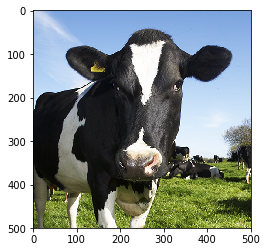

In [7]:
cows_bats.show_image(2)

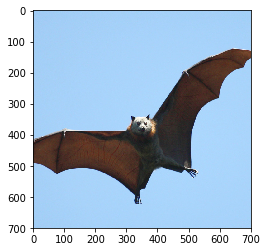

In [8]:
cows_bats.show_image(3)